In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

inputfile="EuCitiesTemperatures.csv"
df = pd.read_csv(inputfile)

**Preprocessing/Analysis**

1.Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [2]:
lat=round((df.groupby("country")["latitude"].mean()),2)
long=round((df.groupby("country")["longitude"].mean()),2)
#fill in missing latitude values
for i in range(len(df["country"].index)):   
    if(np.isnan(df["latitude"][i])==True):
        df.loc[i,"latitude"]=lat[df["country"][i]]
#fill in missing longitude values        
for i in range(len(df["country"].index)):  
    if(np.isnan(df["longitude"][i])==True):
        df.loc[i,"longitude"]=long[df["country"][i]]   

2.Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [3]:
#subset of cities
cities=df.loc[(df["latitude"] >=40) & (df["latitude"] <=60) & (df["longitude"] >=15) & (df["longitude"] <=30)]["city"]

arr=np.empty(0)

for i in range(len(cities)):
    #countries for each city in subset
    countries=df.loc[(df['city'] == cities.values[i])]["country"]
    arr=np.append(arr,countries.values)

c, n = np.unique(arr, return_counts=True)
#countries with max number of cities
maxvalues=[]
count=0
for g in range(len(n)):
    if n[g]==np.max(n):   
        maxvalues.append((c[count]))
        count=count+1
    else:
        count=count+1

print(f"Countries with maximum number of cities in this subset are: {(', '.join(maxvalues))}")

Countries with maximum number of cities in this subset are: Poland, Romania


3.  Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [4]:
#avg temp for each region type
rgn1=round(df.loc[(df["EU"] =="yes") & (df["coastline"]=="yes")]["temperature"].mean(),2)
rgn2=round(df.loc[(df["EU"] =="no") & (df["coastline"]=="no")]["temperature"].mean(),2)
rgn3=round(df.loc[(df["EU"] =="yes") & (df["coastline"]=="no")]["temperature"].mean(),2)
rgn4=round(df.loc[(df["EU"] =="no") & (df["coastline"]=="yes")]["temperature"].mean(),2) 

#fill in missing temp values based on region type
for i in range(len(df["temperature"].index)):   
    if(np.isnan(df["temperature"][i])==True):
        if((df["EU"][i] =="yes") & (df["coastline"][i]=="yes")):
            df.loc[i,"temperature"]=rgn1
        
        elif ((df["EU"][i] =="no") & (df["coastline"][i]=="no")):
            df.loc[i,"temperature"]=rgn2
            
        elif ((df["EU"][i] =="yes") & (df["coastline"][i]=="no")):
            df.loc[i,"temperature"]=rgn3
            
        elif ((df["EU"][i] =="no") & (df["coastline"][i]=="yes")):
            df.loc[i,"temperature"]=rgn4

**Visualization**

1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

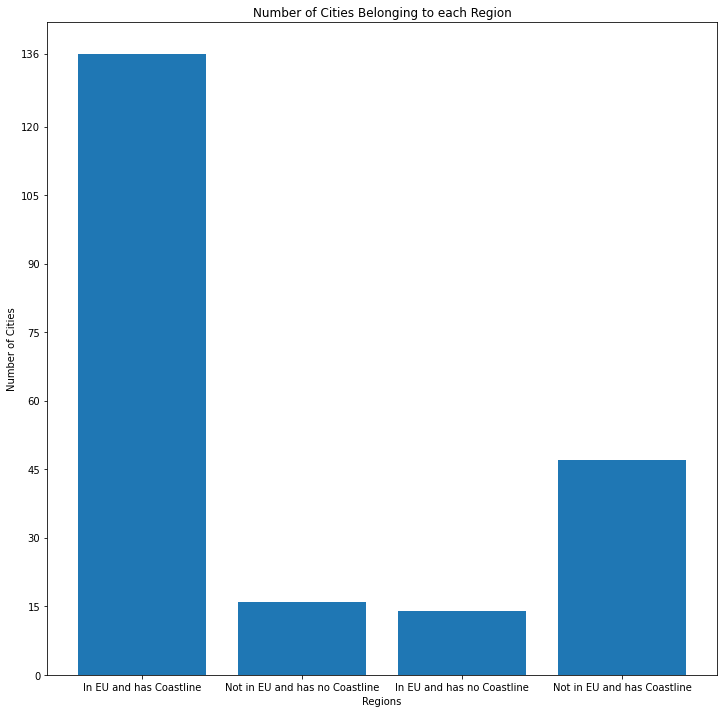

In [5]:
#number of cities for each region type
count1=df.loc[(df["EU"] =="yes") & (df["coastline"]=="yes")]["city"].count()
count2=df.loc[(df["EU"] =="no") & (df["coastline"]=="no")]["city"].count() 
count3=df.loc[(df["EU"] =="yes") & (df["coastline"]=="no")]["city"].count() 
count4=df.loc[(df["EU"] =="no") & (df["coastline"]=="yes")]["city"].count()

plt.figure(figsize=[12,12])

x=["In EU and has Coastline","Not in EU and has no Coastline","In EU and has no Coastline","Not in EU and has Coastline"]
y=[count1,count2,count3,count4]

plt.bar(x,y)
plt.xlabel('Regions')
plt.ylabel('Number of Cities')
plt.yticks((np.linspace(0,max(y),10,dtype=int)))
plt.title("Number of Cities Belonging to each Region")
plt.show()

2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

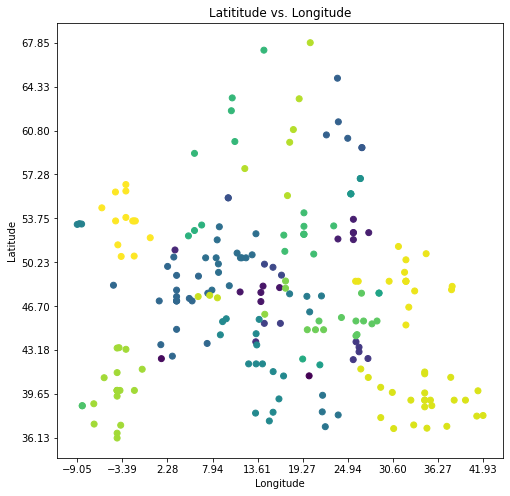

In [6]:
#all countries in inputfile with no duplicates
uniquecountries = []
for u in df["country"]:
    if u not in uniquecountries:
        uniquecountries.append(u)
#sequence of numbers indicating what country a city is in
lst = []
for i in df["country"]:
    for j in uniquecountries:
        if i==j:
            lst.append(uniquecountries.index(j))
            
plt.figure(figsize=(8,8))
x=df["longitude"]
y=df["latitude"]
plt.xticks((np.linspace(x.min(),x.max(),10)))
plt.yticks((np.linspace(y.min(),y.max(),10)))
plt.xlabel('Longitude')
plt.ylabel('Latitude')   
plt.scatter(x,y,c=lst)
plt.title("Latititude vs. Longitude")
plt.show()

3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

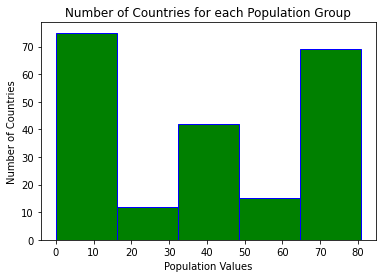

In [7]:
#find population value for each country
popvalues=[]
for i in range(len(df["country"])):
    popvalues.append(df.loc[i,"population"])

plt.xlabel('Population Values')
plt.ylabel('Number of Countries')  
plt.hist(popvalues,bins=5,color="green",edgecolor='blue')
plt.title("Number of Countries for each Population Group")
plt.show()
 

4. Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

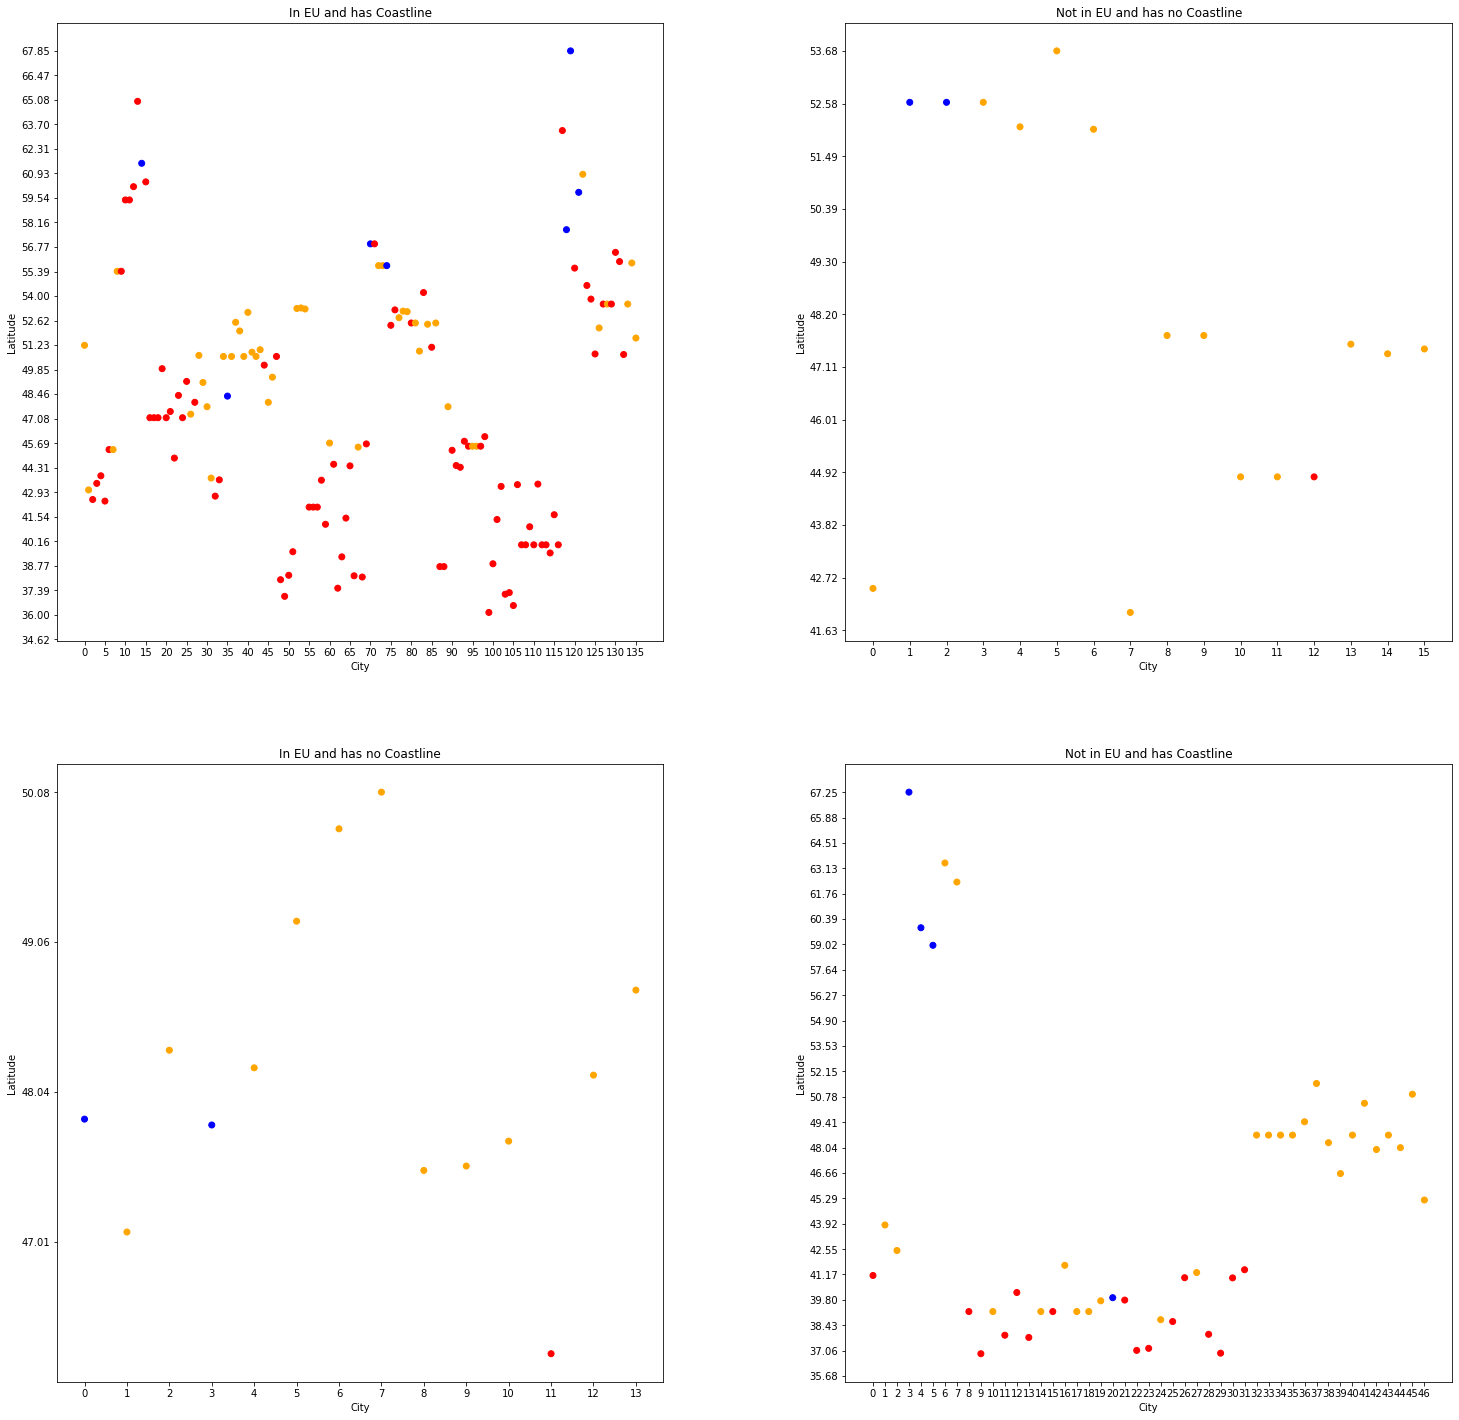

In [8]:
plt.figure(figsize=(25,25))
#lattiudes for each region type
lat1=df.loc[(df["EU"] =="yes") & (df["coastline"]=="yes")]["latitude"]
lat2=df.loc[(df["EU"] =="no") & (df["coastline"]=="no")]["latitude"]
lat3=df.loc[(df["EU"] =="yes") & (df["coastline"]=="no")]["latitude"]
lat4=df.loc[(df["EU"] =="no") & (df["coastline"]=="yes")]["latitude"]

#total number of cities for each region type
region1=df.loc[(df["EU"] =="yes") & (df["coastline"]=="yes")]["city"].count()
region2=df.loc[(df["EU"] =="no") & (df["coastline"]=="no")]["city"].count() 
region3=df.loc[(df["EU"] =="yes") & (df["coastline"]=="no")]["city"].count() 
region4=df.loc[(df["EU"] =="no") & (df["coastline"]=="yes")]["city"].count()

#temperature for each region type
temp1=df.loc[(df["EU"] =="yes") & (df["coastline"]=="yes")]["temperature"]
temp2=df.loc[(df["EU"] =="no") & (df["coastline"]=="no")]["temperature"]
temp3=df.loc[(df["EU"] =="yes") & (df["coastline"]=="no")]["temperature"]
temp4=df.loc[(df["EU"] =="no") & (df["coastline"]=="yes")]["temperature"]

for i in range(4):
    plt.subplot(2,2, i+1)
    if i == 0:
        x=np.arange(0, region1)
        y=lat1
        plt.xlabel('City')
        plt.ylabel('Latitude')
        plt.title("In EU and has Coastline")
        plt.xticks(np.arange(0, region1,step=5))
        plt.yticks((np.linspace(0,y.max(),50)))
        color1=['red' if i>10 else 'blue' if i<6 else 'orange' for i in temp1]
        plt.scatter(x,y,c=color1)
 
    if i == 1:
        x=np.arange(0, region2)
        y=lat2
        plt.xlabel('City')
        plt.ylabel('Latitude')
        plt.xticks(np.arange(0, region2))
        plt.yticks((np.linspace(0,y.max(),50)))
        plt.title('Not in EU and has no Coastline')
        color2=['red' if i>10 else 'blue' if i<6 else 'orange' for i in temp2]
        plt.scatter(x,y,c=color2)
        
    if i == 2:
        x=np.arange(0, region3)
        y=lat3
        plt.xlabel('City')
        plt.ylabel('Latitude')
        plt.xticks(np.arange(0, region3))
        plt.yticks((np.linspace(0,y.max(),50)))
        plt.title('In EU and has no Coastline')
        color3=['red' if i>10 else 'blue' if i<6 else 'orange' for i in temp3]
        plt.scatter(x,y,c=color3) 
        
    if i == 3:
        x=np.arange(0, region4)
        y=lat4
        plt.xlabel('City')
        plt.ylabel('Latitude')
        plt.xticks(np.arange(0, region4))
        plt.yticks((np.linspace(0,y.max(),50)))
        plt.title("Not in EU and has Coastline")
        color4=['red' if i>10 else 'blue' if i<6 else 'orange' for i in temp4]
        plt.scatter(x,y,c=color4)

plt.subplots_adjust(wspace=.3)
plt.show()